# Classificação usando MNIST

`mnist` é uma biblioteca com mais de 70 mil imagens pequenas de algarismos escritos a mão. Ela é amplamente utilizada e vamos chamá-las de `hello world` do aprendizado de máquina.

#### Documentação
[Scikit-Learn](https://scikit-learn.org/stable/index.html)

[matplotLib](https://matplotlib.org/)

[seaborn](https://seaborn.pydata.org/)

## Instalando as dependências

Para continuarmos, vamos instalar as bibliotecas necessárias. No _Colab_, para acessarmos o terminal, utilizamos o `!`. As bibliotecas utilizadas serão

> scikit-learn:
Biblioteca de aprendizado de máquina python open-source que possui diversos algoritmos de classificaçaõ, regressão, agrupamento...

> matplotlib:
Utilizada para plotagem de gráficos e análise de dados

> seaborn:
Baseada na lib anterior. também utilizada para plotagem.

In [ ]:
!pip install scikit-learn matplotlib seaborn numpy pandas

### 1° Passo

Nosso objetivo agora é recuperar os dados. Os conjuntos de dados extraídos do Scikit-Learn tem uma estrutura similar ao `dict`, ou seja, composto por uma chave e valor.

Abaixo, podemos verificar isso e a saída irá conter
- `data`: array com uma linha por instância e uma coluna por características
- `target`: rótulo dado a imagem
- `DESCR`: descrição da base de dados

In [34]:
from sklearn.datasets import fetch_openml # dataset
from sklearn.model_selection import train_test_split # separar os dados de teste do validação
from sklearn.linear_model import LogisticRegression # método de classificação
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report # métrica de avaliação
import matplotlib.pyplot as plt
import seaborn as sns

# 1° passo - importar a base de dados

print("Baixando o MNIST")
mnist = fetch_openml('mnist_784', version=1)
mnist.keys() # Vamos verificar a estrutura de dados que obtemos desse trem

Baixando o MNIST


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
x, y, z = mnist["data"], mnist["target"], mnist["DESCR"]

print(x)
print(y)
print(z)

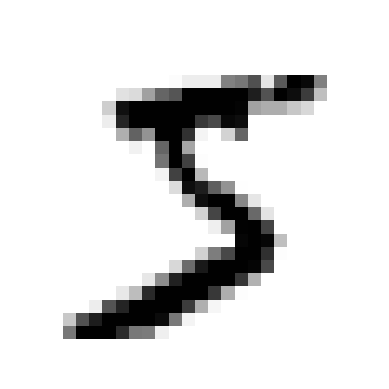

5


numpy.int64

In [35]:
# Vamos verificar o formato da 1° imagem
primeiro_digito = x.iloc[0] # recupera a informação do primeiro
primeiro_digito_array = primeiro_digito.values.reshape(28,28) # se são 28 pixels por 28, apenas remodelamos num array 28 por 28

plt.imshow(primeiro_digito_array, cmap="binary")
plt.axis("off")
plt.show()


print(y[0])
type(y[0]) # repare que o tipo retornado é uma string, quando na verdade, um modelo trabalha com inteiros

### 2° passo

Como dito anteriormente, é necessário dividir os dados em **treinamento** e **teste**. Para nossa separação, vamos usar 15% da base de dados para validação e o resto de treinamento

In [18]:
x, y = mnist.data, mnist.target.astype("int")

# ou podemos usar também uma divisão usando o próprio scikit
x_treino, x_test, y_treino, y_test = train_test_split(x,y, test_size=0.15)

### 3° Passo

Partimos agora para a parte de treinamento. O algoritmo utilizado será uma **Regressão Logística** que, apesar do nome, é uma classificação que usa probabilidade para saber se um item pertence a uma classe.

In [ ]:
# 3° passo - treinamento

meu_primeiro_modelo = LogisticRegression(solver="lbfgs", max_iter=100) # criar a regressão logística
meu_primeiro_modelo.fit(x_treino,y_treino) # ajustar o modelo aos dados de treino


## 4° passo

Após o treinamento, vamos usar os dados de validação para testar se o nosso modelo está realizando as previsões como esperado

In [25]:
y_previsto = meu_primeiro_modelo.predict(x_test)

### 5° Passo

Calcular as métricas utilizando **Acurácia, Precisão e Recall**.

(sinta-se a vontade para calcular o F1-Score)

$$ \text{F1-Score}= 2\times \frac{\text{Precisão}\times\text{Recall}}{\text{Precisão}+\text{Recall}}  $$

In [ ]:
acuracia = accuracy_score(y_test, y_previsto)
precisao = precision_score(y_test, y_previsto, average="macro")
recall = recall_score(y_test, y_previsto, average="macro")
# clasificacao_classe = classification_report(y_test, y_previsto)

print(f"Acurácia: {acuracia:.4f}")
print(f"Precisão (média macro): {precisao:.4f}")
print(f"Recall (média macro): {recall:.4f}")


### Passo bonus!

Montaremos agora a matriz de confusão para averiguar a quantidade classes que foram (in)corretamente definidas. Para tanto, iremos usar agora da classe do seaborn.

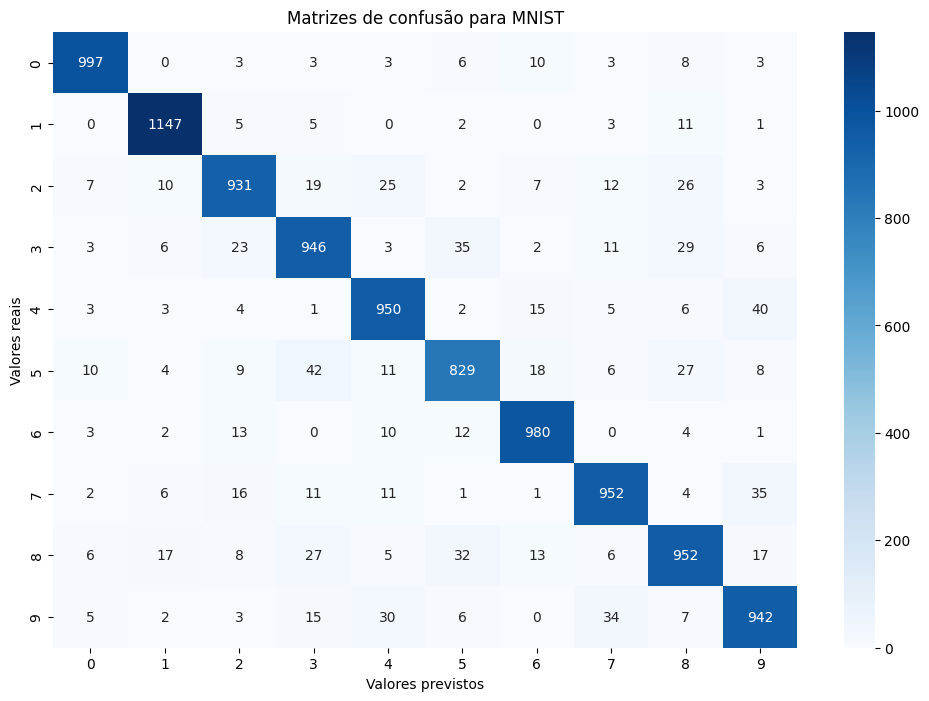

In [32]:
matriz_confusao = confusion_matrix(y_test, y_previsto)

plt.figure(figsize=(12,8))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues")
plt.title("Matrizes de confusão para MNIST")
plt.xlabel("Valores previstos")
plt.ylabel("Valores reais")
plt.show()
